In [92]:
from keras import layers 
from keras import models 
import tensorflow as tf
import cv2
import numpy as np 
import os 
import imghdr
import matplotlib.pyplot as plt
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import accuracy_score
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten
#from sklearn import Conv2D, MaxPool2D, Dense, Flatten


In [93]:
#import the data
dataset_path ="Tuber_Dataset"


In [94]:
#list path to dataset
os.listdir(os.path.join(dataset_path, 'Normal'))

['Normal-1.png',
 'Normal-10.png',
 'Normal-100.png',
 'Normal-1000.png',
 'Normal-1001.png',
 'Normal-1002.png',
 'Normal-1003.png',
 'Normal-1004.png',
 'Normal-1005.png',
 'Normal-1006.png',
 'Normal-1007.png',
 'Normal-1008.png',
 'Normal-1009.png',
 'Normal-101.png',
 'Normal-1010.png',
 'Normal-1011.png',
 'Normal-1012.png',
 'Normal-1013.png',
 'Normal-1014.png',
 'Normal-1015.png',
 'Normal-1016.png',
 'Normal-1017.png',
 'Normal-1018.png',
 'Normal-1019.png',
 'Normal-102.png',
 'Normal-1020.png',
 'Normal-1021.png',
 'Normal-1022.png',
 'Normal-1023.png',
 'Normal-1024.png',
 'Normal-1025.png',
 'Normal-1026.png',
 'Normal-1027.png',
 'Normal-1028.png',
 'Normal-1029.png',
 'Normal-103.png',
 'Normal-1030.png',
 'Normal-1031.png',
 'Normal-1032.png',
 'Normal-1033.png',
 'Normal-1034.png',
 'Normal-1035.png',
 'Normal-1036.png',
 'Normal-1037.png',
 'Normal-1038.png',
 'Normal-1039.png',
 'Normal-104.png',
 'Normal-1040.png',
 'Normal-1041.png',
 'Normal-1042.png',
 'Normal-1

In [95]:
#initializing arrays to store data and labels
image_data = []
labels = []

In [96]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [97]:
for image_class in os.listdir(dataset_path):             # loop through every image in the data_dir directory
    for image in os.listdir(os.path.join(dataset_path, image_class)):       #loop through every image in the tomato and apple dir
        image_path = os.path.join(dataset_path, image_class, image)
        try:                                                        # check for the various image extesion in the try and except                    
            img = cv2.imread(image_path)                    # if it is not in the image 
            tip = imghdr.what(image_path)                   # not in the valid image extension
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)                   # remove an image file using its path
        except Exception as e:                              
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

In [98]:
dataset_path = tf.keras.utils.image_dataset_from_directory(dataset_path) #enable us to get the number of images in the folder data

Found 4200 files belonging to 2 classes.


In [99]:
# convert the data loaded into a numpy iterator because the dataset is not preloaded into the memory and helps to loop through batch of data
data_iterator = dataset_path.as_numpy_iterator() 

In [100]:
batch = data_iterator.next() # access our batch data which is of 2 parts(images and labels) 

In [101]:
batch[0].shape # first part which is images represented as numpy arrays

(32, 256, 256, 3)

In [102]:
batch[1]

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

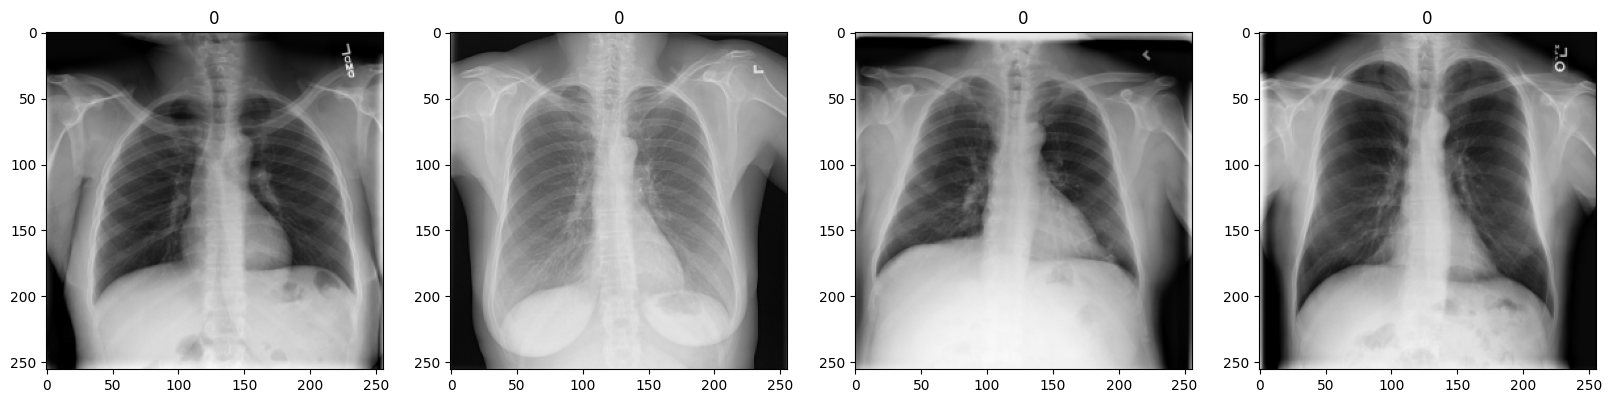

In [103]:
# run visualization using matplotlip and subplot to plot the images

fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [104]:
dataset_path = dataset_path.map(lambda x,y: (x/255, y))  # in the data pipeline, the function map which helps in pulling the transformation from the pipeline. x rep images or variables, 
# y rep target variable or label. always go to tf.data.dataset to see other transformatn other than map. x is scaled bt 0-1

In [105]:
dataset_path.as_numpy_iterator().next() # helps to grab our data in batches

(array([[[[0.01568628, 0.01568628, 0.01568628],
          [0.01666667, 0.01666667, 0.01666667],
          [0.01960784, 0.01960784, 0.01960784],
          ...,
          [0.06666667, 0.06666667, 0.06666667],
          [0.09313726, 0.09313726, 0.09313726],
          [0.07745098, 0.07745098, 0.07745098]],
 
         [[0.01666667, 0.01666667, 0.01666667],
          [0.02058824, 0.02058824, 0.02058824],
          [0.02254902, 0.02254902, 0.02254902],
          ...,
          [0.05196078, 0.05196078, 0.05196078],
          [0.07450981, 0.07450981, 0.07450981],
          [0.05980392, 0.05980392, 0.05980392]],
 
         [[0.01764706, 0.01764706, 0.01764706],
          [0.01960784, 0.01960784, 0.01960784],
          [0.01862745, 0.01862745, 0.01862745],
          ...,
          [0.04313726, 0.04313726, 0.04313726],
          [0.05882353, 0.05882353, 0.05882353],
          [0.04705882, 0.04705882, 0.04705882]],
 
         ...,
 
         [[0.43039215, 0.43039215, 0.43039215],
          [0.51568

In [106]:
train_size = int(len(dataset_path)*.7) # used during training
val_size = int(len(dataset_path)*.2) #used during training to fine tune the accuracy of the model while training
test_size = int(len(dataset_path)*.1) # used after the training to test the overal accuracy of the model


In [107]:
train_size+val_size+test_size

131

In [108]:
train = dataset_path.take(train_size) # the take and skip method determines the amount of data to allocate to train or 
val = dataset_path.skip(train_size).take(val_size) # data.skip skips the data already allocated to train 
test = dataset_path.skip(train_size+val_size).take(test_size)

In [109]:
model = models.Sequential()


In [110]:
model.add(Conv2D(20,(3,3), 1, activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D())

C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [111]:
model.add(Conv2D(10,(3, 3), 1, activation='relu'))
model.add(MaxPool2D())

In [112]:
model.add(Conv2D(7, (3, 3), 1, activation='relu'))
model.add(MaxPool2D())

In [113]:
#output layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1,  activation='sigmoid'))

In [114]:
model.compile(optimizer='adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [115]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 254, 254, 20)   │           560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 127, 127, 20)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 125, 125, 10)   │         1,810 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 62, 62, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 60, 60, 7)      │           637 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 30, 30, 7)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 6300)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 256)            │     1,613,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,616,320 (6.17 MB)

 Trainable params: 1,616,320 (6.17 MB)

 Non-trainable params: 0 (0.00 B)

In [116]:
logdir="logs"#create a logs directory/folder

In [117]:
tensorflow_callbacks=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [118]:
# time to train the data
hist = model.fit(train, epochs=2, validation_data=val, callbacks=[tensorflow_callbacks])
hist

Epoch 1/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 224s 2s/step - accuracy: 0.8764 - loss: 0.3357 - val_accuracy: 0.9519 - val_loss: 0.1330
Epoch 2/2
92/92 ━━━━━━━━━━━━━━━━━━━━ 222s 2s/step - accuracy: 0.9462 - loss: 0.1374 - val_accuracy: 0.9651 - val_loss: 0.1115


In [119]:
hist.history

{'accuracy': [0.903192937374115, 0.9504076242446899],
 'loss': [0.23798438906669617, 0.13161472976207733],
 'val_accuracy': [0.9519230723381042, 0.9651442170143127],
 'val_loss': [0.1329902559518814, 0.11145809292793274]}

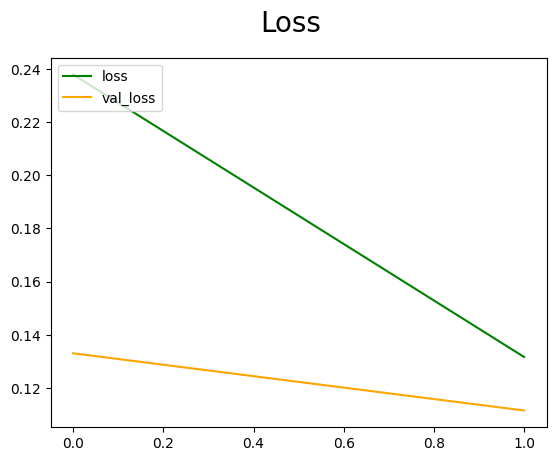

In [120]:
#plot the performance
fig = plt.figure()
plt.plot(hist.history['loss'], color='green', label='loss')
plt.plot(hist.history['val_loss'] , color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc='upper left')
plt.show()

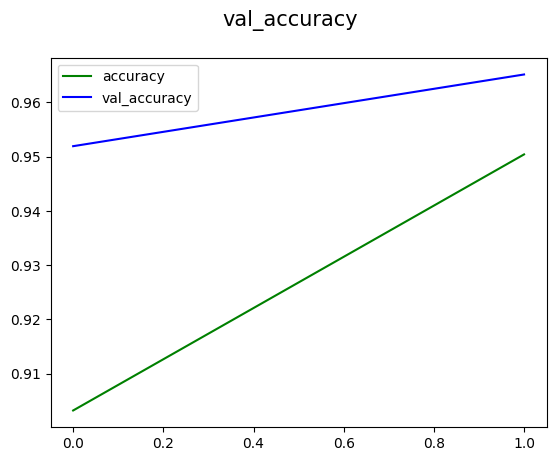

In [121]:
# plot the accuracy
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='green', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='blue', label='val_accuracy')
plt.suptitle('val_accuracy', fontsize=15)
plt.legend(loc='upper left')
plt.show()

In [122]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


In [123]:
# Assuming val or test data is in batches
y_true = np.concatenate([y for x, y in val], axis=0)  # True labels from the validation set
y_pred_probs = model.predict(val)  # Model predictions (probabilities)
y_pred = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class indices


26/26 ━━━━━━━━━━━━━━━━━━━━ 18s 310ms/step


In [124]:
# Generate classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Normal', 'Tuberculosis']))


Classification Report:
              precision    recall  f1-score   support

      Normal       0.84      1.00      0.92       703
Tuberculosis       0.00      0.00      0.00       129

    accuracy                           0.84       832
   macro avg       0.42      0.50      0.46       832
weighted avg       0.71      0.84      0.77       832



C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:151

In [125]:
# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Normal', 'Tuberculosis'])


<Figure size 900x700 with 0 Axes>

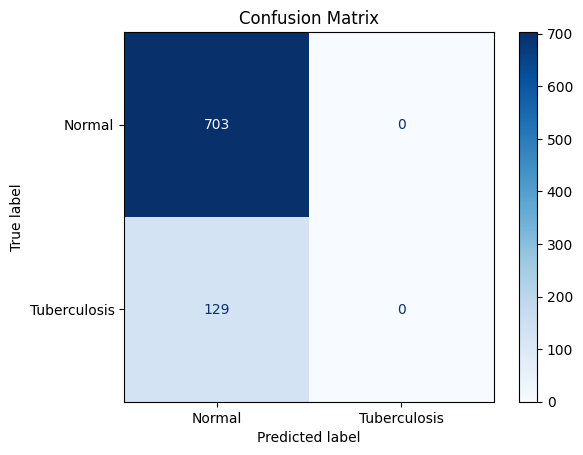

In [126]:
# Plot confusion matrix
plt.figure(figsize=(9, 7))
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()
